In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
 Path = "drive/MyDrive" 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(Path+'/country_vaccinations.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1764 non-null   object 
 1   iso_code                             1574 non-null   object 
 2   date                                 1764 non-null   object 
 3   total_vaccinations                   1175 non-null   float64
 4   people_vaccinated                    911 non-null    float64
 5   people_fully_vaccinated              435 non-null    float64
 6   daily_vaccinations_raw               958 non-null    float64
 7   daily_vaccinations                   1697 non-null   float64
 8   total_vaccinations_per_hundred       1175 non-null   float64
 9   people_vaccinated_per_hundred        911 non-null    float64
 10  people_fully_vaccinated_per_hundred  435 non-null    float64
 11  daily_vaccinations_per_million

In [6]:
df


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
5,Argentina,ARG,2021-01-03,NaN,NaN,NaN,NaN,7400.0,NaN,NaN,NaN,164.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
6,Argentina,ARG,2021-01-04,39599.0,NaN,NaN,NaN,6483.0,0.09,NaN,NaN,143.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
7,Argentina,ARG,2021-01-05,NaN,NaN,NaN,NaN,7984.0,NaN,NaN,NaN,177.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
8,Argentina,ARG,2021-01-06,NaN,NaN,NaN,NaN,8173.0,NaN,NaN,NaN,181.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
9,Argentina,ARG,2021-01-07,NaN,NaN,NaN,NaN,8363.0,NaN,NaN,NaN,185.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [7]:
#optimizing the source dataset 
df.drop(['iso_code', 'source_website'], axis=1, inplace=True)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1764 non-null   object 
 1   date                                 1764 non-null   object 
 2   total_vaccinations                   1175 non-null   float64
 3   people_vaccinated                    911 non-null    float64
 4   people_fully_vaccinated              435 non-null    float64
 5   daily_vaccinations_raw               958 non-null    float64
 6   daily_vaccinations                   1697 non-null   float64
 7   total_vaccinations_per_hundred       1175 non-null   float64
 8   people_vaccinated_per_hundred        911 non-null    float64
 9   people_fully_vaccinated_per_hundred  435 non-null    float64
 10  daily_vaccinations_per_million       1697 non-null   float64
 11  vaccines                      

In [9]:
df.isnull().sum()

country                                   0
date                                      0
total_vaccinations                      589
people_vaccinated                       853
people_fully_vaccinated                1329
daily_vaccinations_raw                  806
daily_vaccinations                       67
total_vaccinations_per_hundred          589
people_vaccinated_per_hundred           853
people_fully_vaccinated_per_hundred    1329
daily_vaccinations_per_million           67
vaccines                                  0
source_name                               0
dtype: int64

In [10]:
df.drop(['daily_vaccinations_raw'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1764 non-null   object 
 1   date                                 1764 non-null   object 
 2   total_vaccinations                   1175 non-null   float64
 3   people_vaccinated                    911 non-null    float64
 4   people_fully_vaccinated              435 non-null    float64
 5   daily_vaccinations                   1697 non-null   float64
 6   total_vaccinations_per_hundred       1175 non-null   float64
 7   people_vaccinated_per_hundred        911 non-null    float64
 8   people_fully_vaccinated_per_hundred  435 non-null    float64
 9   daily_vaccinations_per_million       1697 non-null   float64
 10  vaccines                             1764 non-null   object 
 11  source_name                   

In [12]:
df.isnull().sum()

country                                   0
date                                      0
total_vaccinations                      589
people_vaccinated                       853
people_fully_vaccinated                1329
daily_vaccinations                       67
total_vaccinations_per_hundred          589
people_vaccinated_per_hundred           853
people_fully_vaccinated_per_hundred    1329
daily_vaccinations_per_million           67
vaccines                                  0
source_name                               0
dtype: int64

In [13]:
df2 = pd.DataFrame(df['source_name'].value_counts())
df2

,source_name
Ministry of Health,499
Government of the United Kingdom,221
National Health Commission,77
National Health Service,66
Government of Israel,42
Centers for Disease Control and Prevention,41
Federal Office of Public Health,38
Department of Statistics and Health Information,37
Secretary of Health,36
Extraordinary commissioner for the Covid-19 emergency,34


most used source tabular form 

In [14]:
df3 = pd.DataFrame(df['country'].value_counts())
df3

,country
Wales,47
Northern Ireland,47
Scotland,47
China,44
Israel,42
United States,41
United Kingdom,40
England,40
Bahrain,38
Switzerland,38


No of days Vaccination process been conducted per country tabular represntation.

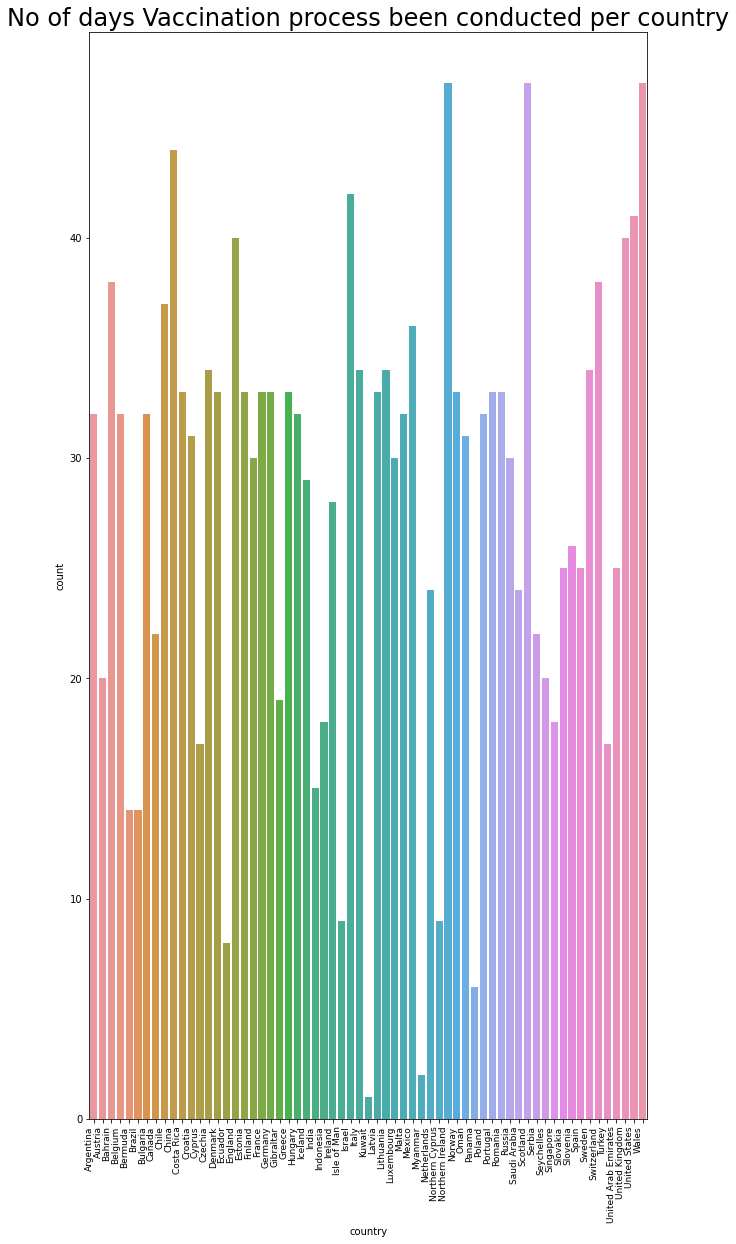

In [15]:
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
das = sns.countplot(x=df['country'] , ax=ax)
das.set_xticklabels(das.get_xticklabels(), rotation=90, ha="right", fontsize=9 )
plt.title("No of days Vaccination process been conducted per country", size=24)
plt.show()

In [16]:
df4 = pd.DataFrame(df['date'].value_counts())
df4

,date
2021-01-21,60
2021-01-22,60
2021-01-19,58
2021-01-23,58
2021-01-20,58
2021-01-17,57
2021-01-18,57
2021-01-24,57
2021-01-16,57
2021-01-27,56


Vaccine program conducted by different country on the same day tabular represntation.

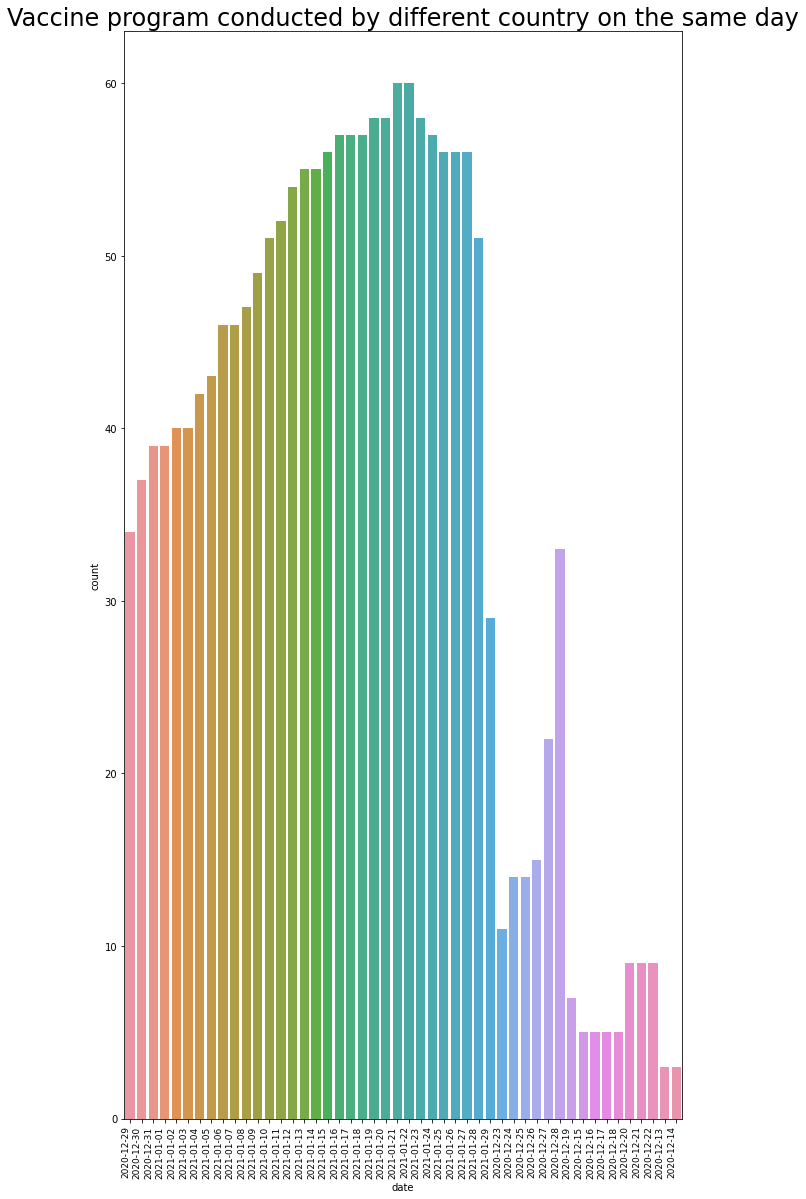

In [17]:
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
das = sns.countplot(x=df['date'] , ax=ax )
das.set_xticklabels(das.get_xticklabels(), rotation=90, ha="right", fontsize=9 )
plt.title("Vaccine program conducted by different country on the same day", size=24)
plt.show()

21 and 22 was the days when most vaccines where utilized by countries all over the world

In [18]:
df5 = pd.DataFrame(df['vaccines'].value_counts())
df5

,vaccines
Pfizer/BioNTech,838
"Moderna, Pfizer/BioNTech",419
"Oxford/AstraZeneca, Pfizer/BioNTech",221
"Pfizer/BioNTech, Sinopharm",63
Sputnik V,62
"CNBG, Sinovac",44
Sinovac,35
"Pfizer/BioNTech, Sinopharm, Sputnik V",22
"Oxford/AstraZeneca, Sinopharm",20
"Covaxin, Oxford/AstraZeneca",15


Most Trusted Vaccines Used By Country tabular represntation 

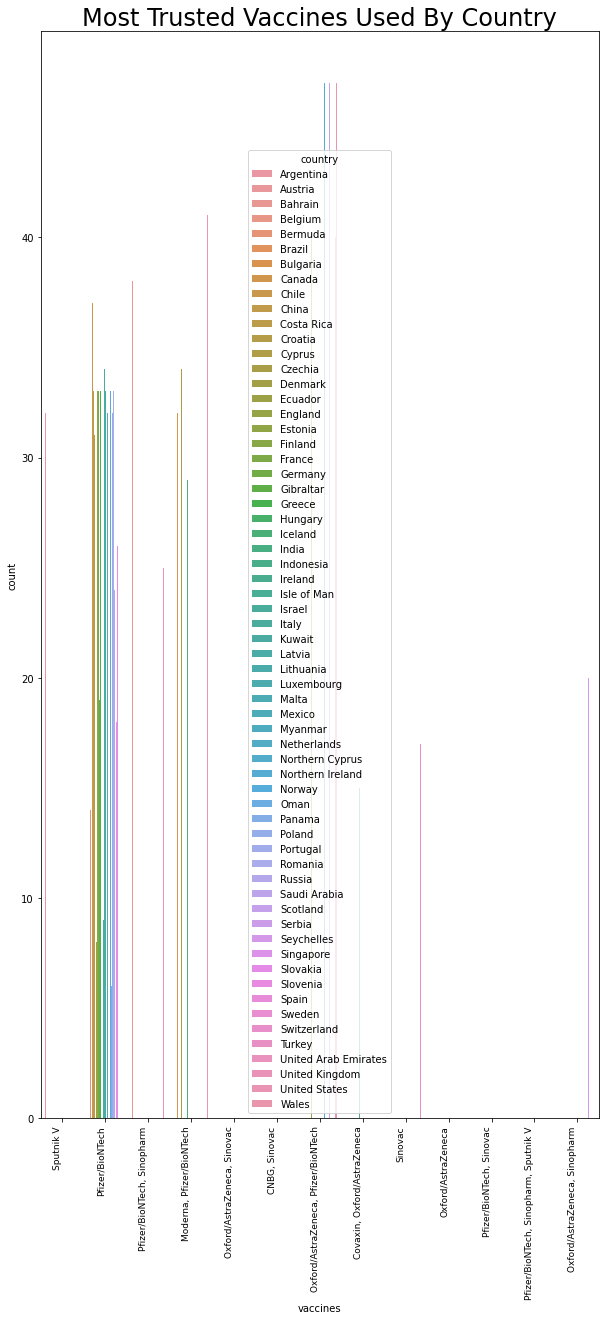

In [19]:
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
das = sns.countplot(x=df['vaccines'] , ax=ax , hue=df['country'])
das.set_xticklabels(das.get_xticklabels(), rotation=90, ha="right", fontsize=9 )
plt.title("Most Trusted Vaccines Used By Country", size=24)
plt.show()

Pfizer/BioNTech	 is used by many countries in large amount but Oxford/AstraZeneca, Pfizer/BioNTech	together was used in large quantities in a single day.

In [20]:
df.isnull().sum()

country                                   0
date                                      0
total_vaccinations                      589
people_vaccinated                       853
people_fully_vaccinated                1329
daily_vaccinations                       67
total_vaccinations_per_hundred          589
people_vaccinated_per_hundred           853
people_fully_vaccinated_per_hundred    1329
daily_vaccinations_per_million           67
vaccines                                  0
source_name                               0
dtype: int64

In [21]:
df['total_vaccinations'].fillna((df['total_vaccinations'].mean()), inplace=True)
df['people_vaccinated'].fillna((df['people_vaccinated'].mean()), inplace=True)
df['people_fully_vaccinated'].fillna((df['people_fully_vaccinated'].mean()), inplace=True)
df['daily_vaccinations'].fillna((df['daily_vaccinations'].mean()), inplace=True)
df['total_vaccinations_per_hundred'].fillna((df['total_vaccinations_per_hundred'].mean()), inplace=True)
df['daily_vaccinations_per_million'].fillna((df['daily_vaccinations_per_million'].mean()), inplace=True)
df['people_vaccinated_per_hundred'].fillna((df['people_vaccinated_per_hundred'].mean()), inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna((df['people_fully_vaccinated_per_hundred'].mean()), inplace=True)




In [22]:
df.isnull().sum()

country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
dtype: int64

In [23]:
pd.set_option('mode.use_inf_as_na', True)

In [24]:
df.isnull().sum()

country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
dtype: int64

In [25]:
!pip install joypy


In [26]:
from joypy import joyplot

In [27]:
from pandas.api.types import CategoricalDtype

cat_month = CategoricalDtype (['Malta','Croatia','Oman','Russia',	'Finland','Luxembourg','Iceland','Ireland','Slovenia'	,'Slovakia','Spain','United Arab Emirates','Netherlands','Saudi Arabia'	
                               ,'Serbia'	,'Canada','Seychelles'	,'Austria'	,'Gibraltar'	,'Indonesia','Singapore','Cyprus'	,'Turkey'	,'India'	,'Brazil'	
                               ,'Bermuda'	,'Isle of Man'	,'Northern Cyprus'	,'Ecuador','Panama'	,'Myanmar'	,'Kuwait','Scotland','Wales',	'Northern Ireland',	'China',	'Israel','United States','England','United Kingdom','Switzerland','Bahrain',		
                               'Chile','Mexico','Sweden','Czechia','Italy','Lithuania','Estonia','Romania','France','Germany','Greece','Norway','Denmark','Latvia','Portugal','Costa Rica','Hungary','Argentina','Poland','Bulgaria','Belgium'
                              ])
df['country']= df['country'].astype(cat_month)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   country                              1764 non-null   category
 1   date                                 1764 non-null   object  
 2   total_vaccinations                   1764 non-null   float64 
 3   people_vaccinated                    1764 non-null   float64 
 4   people_fully_vaccinated              1764 non-null   float64 
 5   daily_vaccinations                   1764 non-null   float64 
 6   total_vaccinations_per_hundred       1764 non-null   float64 
 7   people_vaccinated_per_hundred        1764 non-null   float64 
 8   people_fully_vaccinated_per_hundred  1764 non-null   float64 
 9   daily_vaccinations_per_million       1764 non-null   float64 
 10  vaccines                             1764 non-null   object  
 11  source_name      

<Figure size 432x288 with 0 Axes>

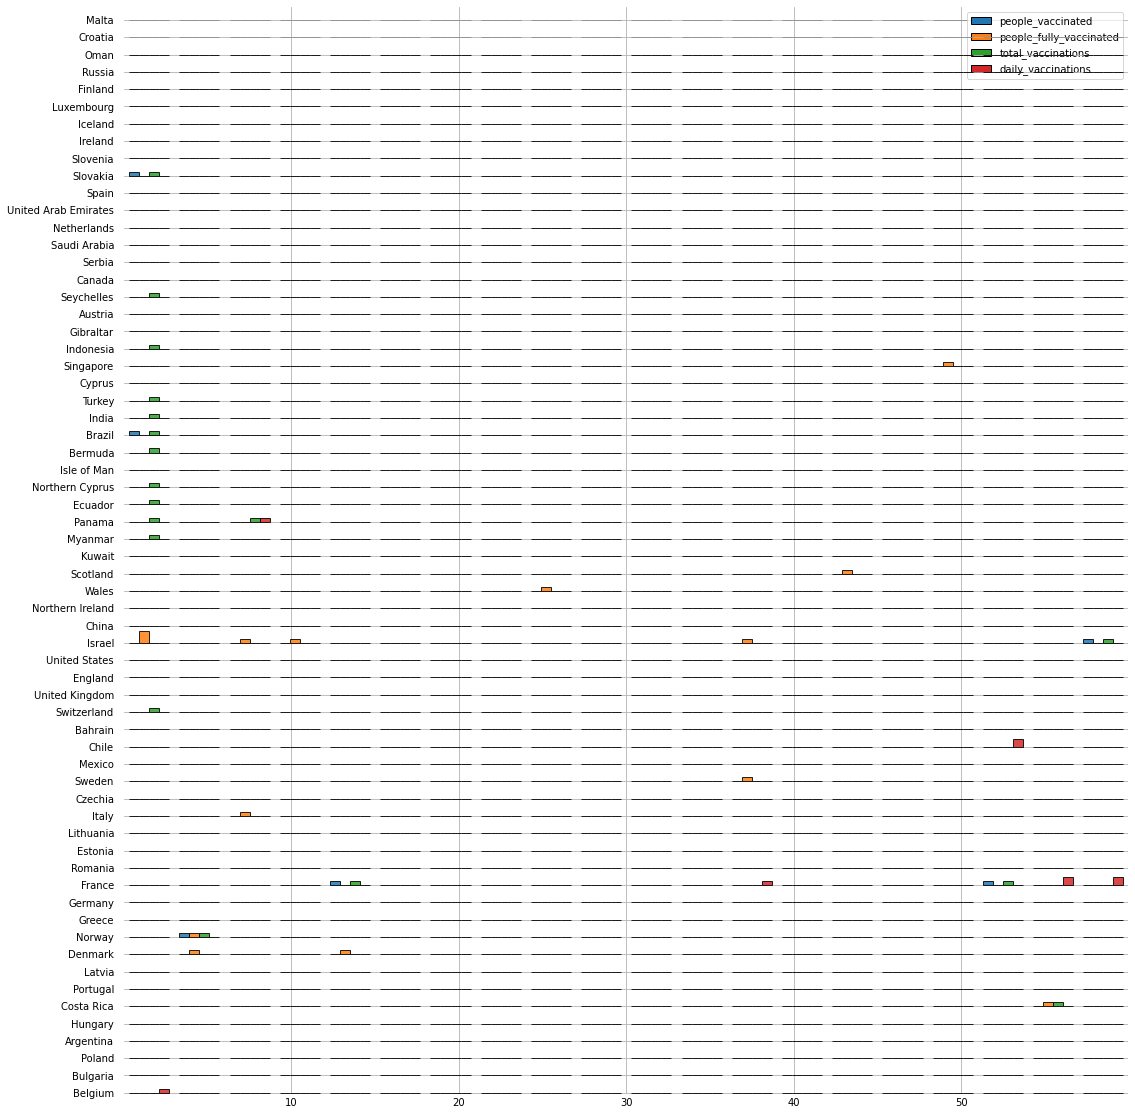

In [29]:
plt.figure()
joyplot(
    data=df[['country','people_vaccinated','people_fully_vaccinated','total_vaccinations','daily_vaccinations']],
    by='country',x_range=(0,60),hist=True, overlap=0, column=["people_vaccinated",'people_fully_vaccinated','total_vaccinations','daily_vaccinations'],
                          grid=True, legend=True,figsize=(18,20),alpha=0.85,bins=20
                          )
plt.show()

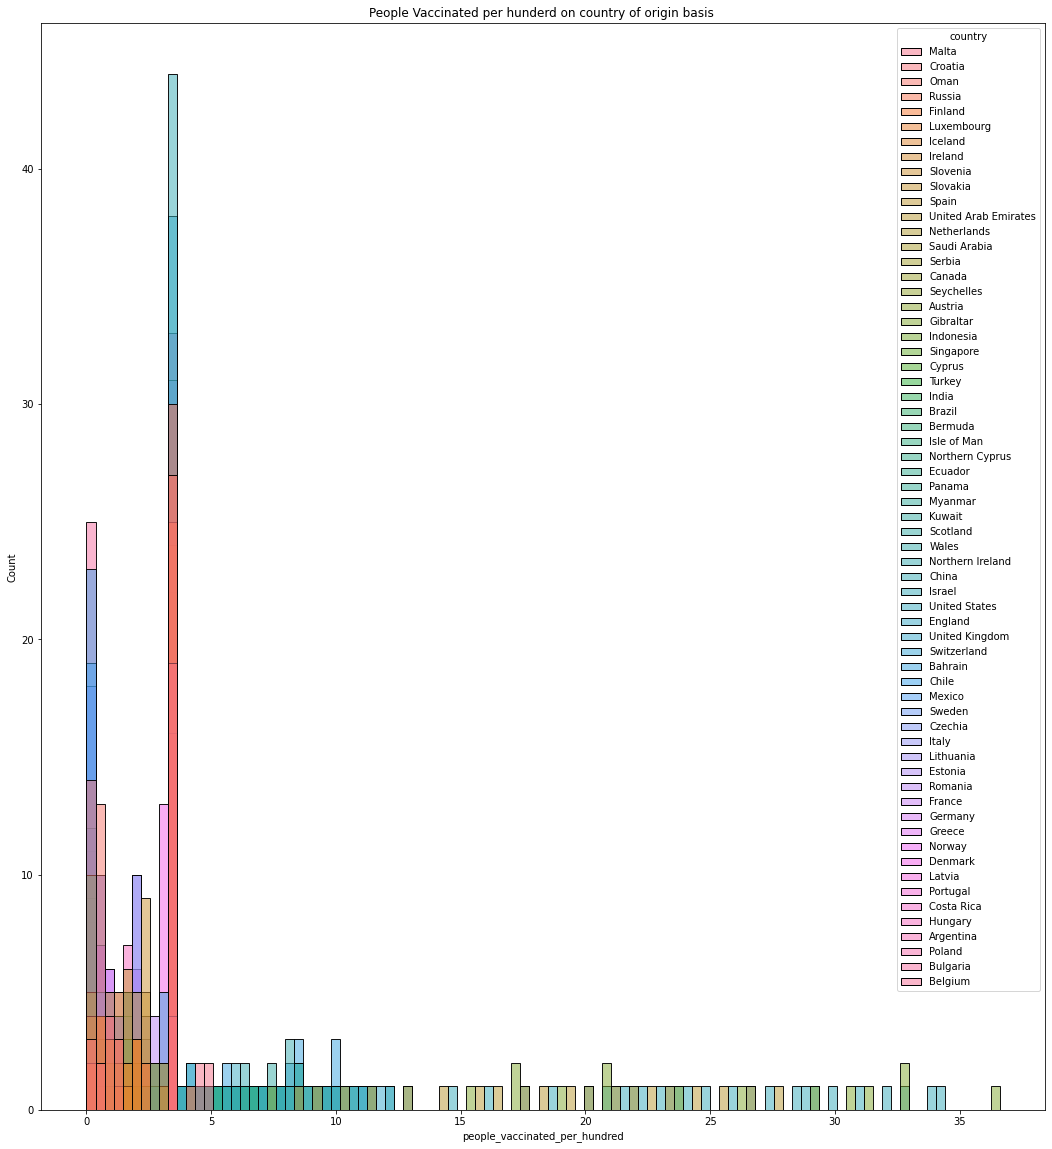

In [30]:
plt.figure(figsize=(18,20))
sns.histplot(df,x = "people_vaccinated_per_hundred", hue="country")
plt.title("People Vaccinated per hunderd on country of origin basis ")
plt.show()

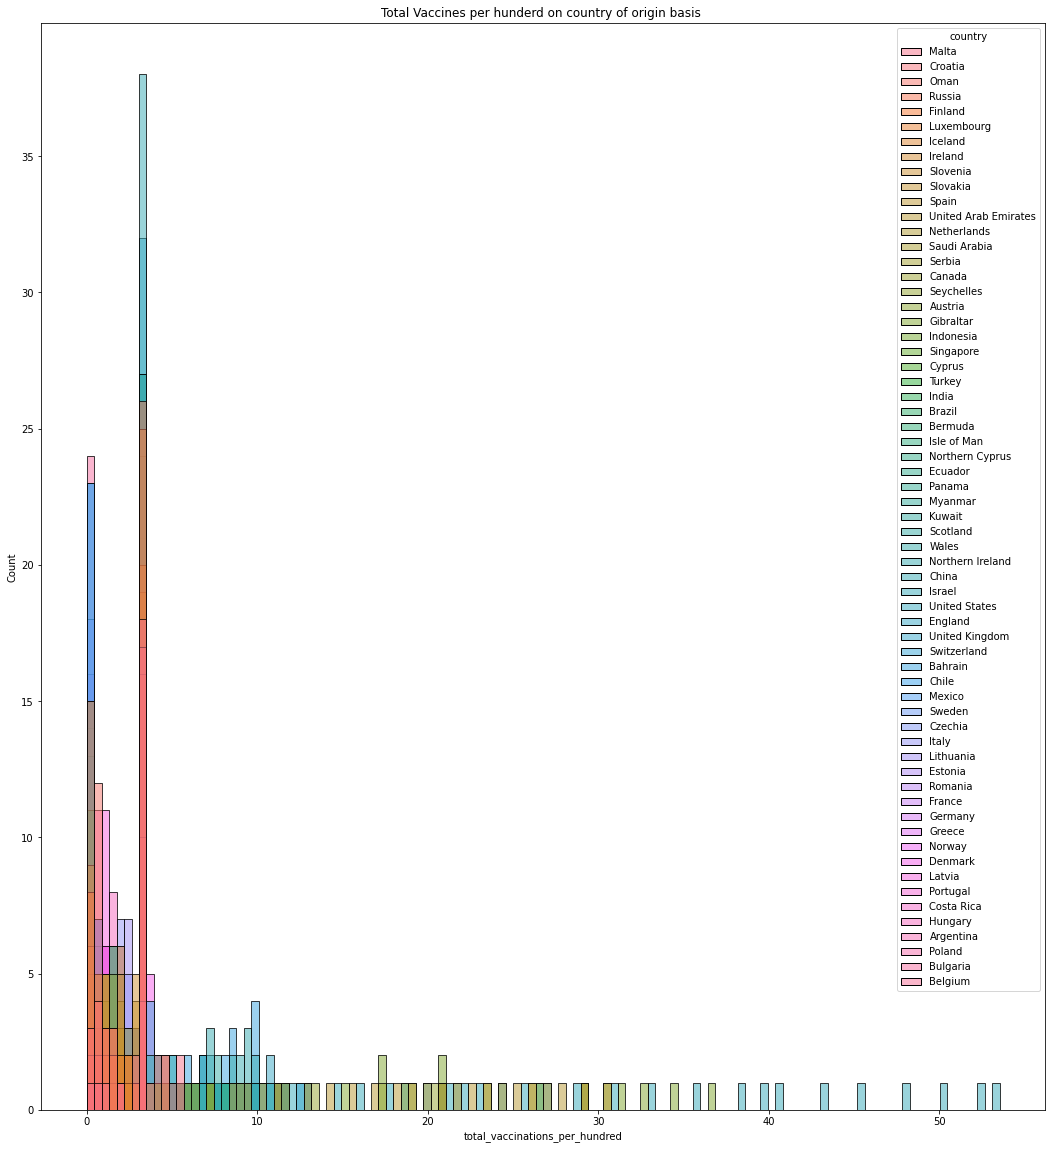

In [32]:
plt.figure(figsize=(18,20))
sns.histplot(df,x = "total_vaccinations_per_hundred", hue="country")
plt.title("Total Vaccines per hunderd on country of origin basis ")
plt.show()

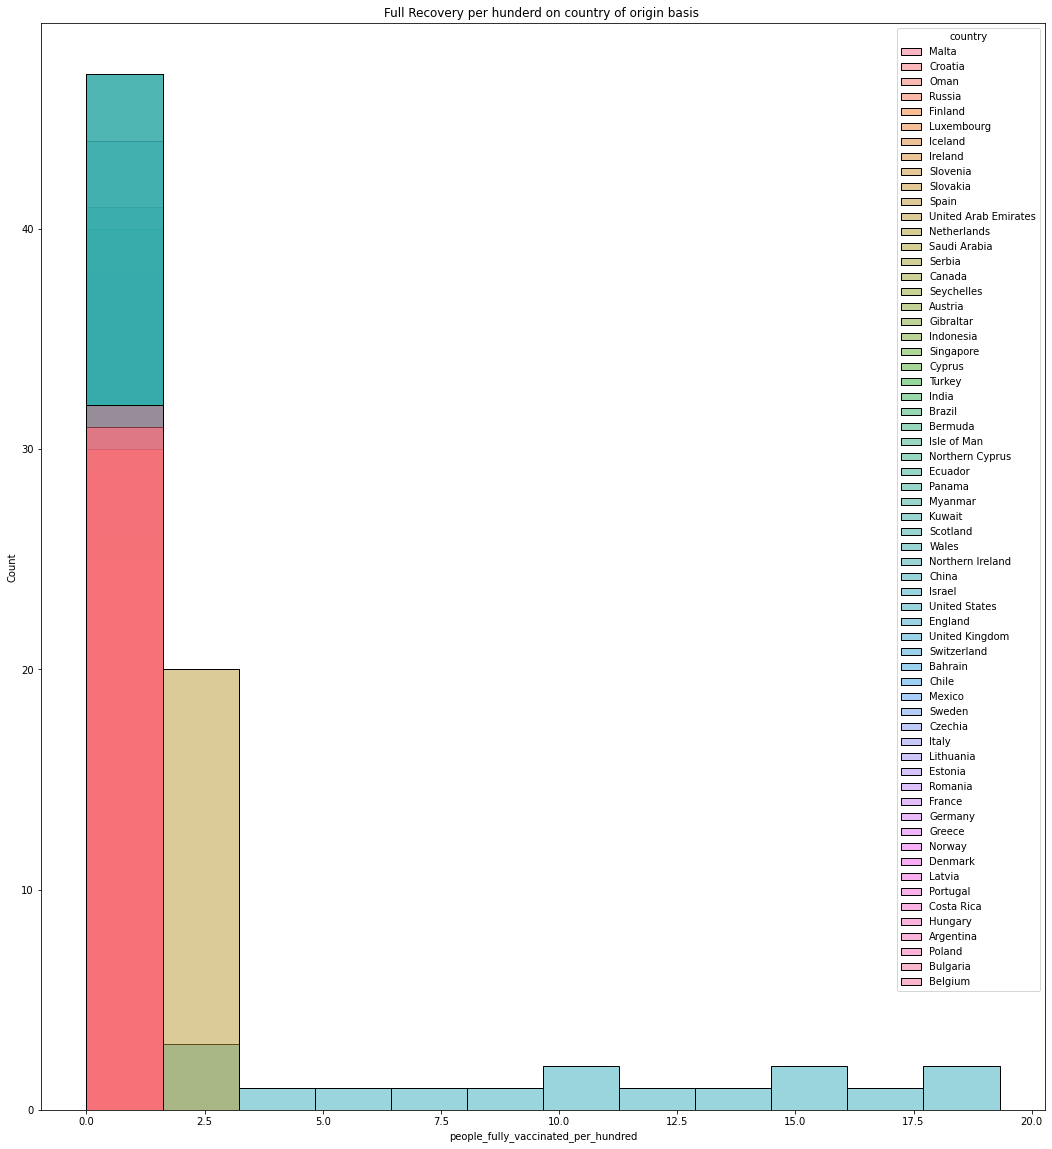

In [34]:
plt.figure(figsize=(18,20))
sns.histplot(df,x = "people_fully_vaccinated_per_hundred", hue="country")
plt.title("Full Recovery per hunderd on country of origin basis ")
plt.show()

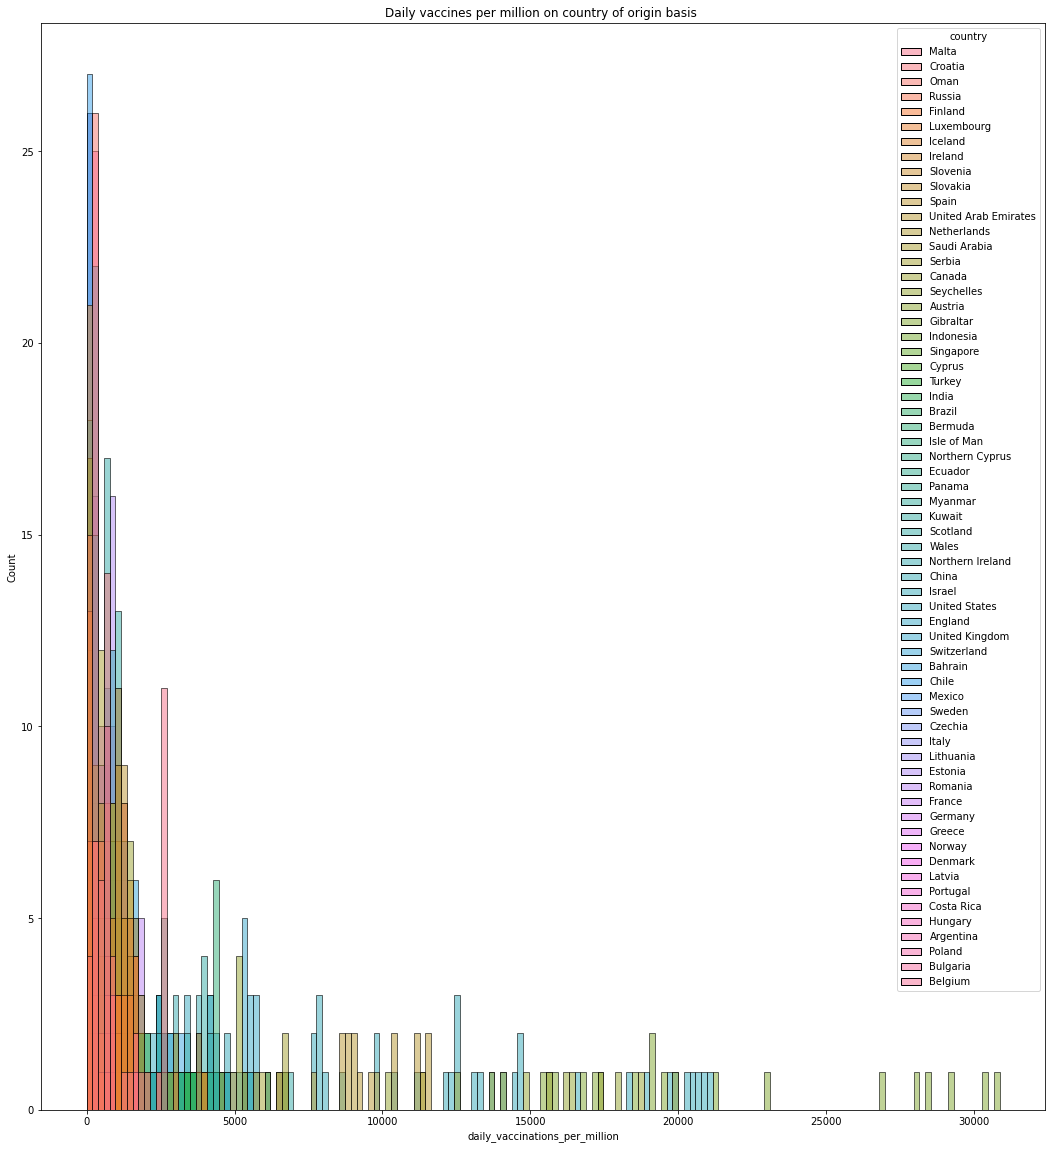

In [35]:
plt.figure(figsize=(18,20))
sns.histplot(df,x = "daily_vaccinations_per_million", hue="country")
plt.title("Daily vaccines per million on country of origin basis ")
plt.show()